<a href="https://colab.research.google.com/github/lmcanavals/analytics_visualization/blob/main/notebooks/aa_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

posiblemente sea necesario instalar wquantiles con la siguiente línea:

In [ ]:
!pip install wquantiles

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
BASE_URL = "https://raw.githubusercontent.com/lmcanavals/avd/main/data/"
AIRLINE_STATS_CSV   = f"{BASE_URL}airline_stats.csv"
AIRPORT_DELAYS_CSV  = f"{BASE_URL}dfw_airline.csv"
KC_TAX_CSV          = f"{BASE_URL}kc_tax.csv.gz"
LC_LOANS_CSV        = f"{BASE_URL}lc_loans.csv"
SP500_DATA_CSV      = f"{BASE_URL}sp500_data.csv.gz"
SP500_SECTORS_CSV   = f"{BASE_URL}sp500_sectors.csv"
STATE_CSV           = f"{BASE_URL}state.csv"

## Estimación de ubicación

In [ ]:
state = pd.read_csv(STATE_CSV)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
state['Population'].mean()

6162876.3

In [ ]:
trim_mean(state['Population'], 0.1)

4783697.125

In [ ]:
state['Population'].median()

4436369.5

In [ ]:
state['Murder.Rate'].mean()

4.066

In [ ]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

## Estimaciones de Variabilidad

In [ ]:
state['Population'].std()

6848235.347401142

In [ ]:
state['Population'].quantile(.75) - state['Population'].quantile(.25)

4847308.0

In [ ]:
robust.scale.mad(state['Population'])

3849876.1459979336

In [ ]:
abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817

3849876.1459979336

## Percentiles y Boxplots

In [ ]:
percentages = [.05, .25, .5, .75, .95]

In [ ]:
state['Murder.Rate'].quantile(percentages)

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [ ]:
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}' for p in percentages]
df.transpose()

,5.0,25.0,50.0,75.0,95.0
Murder.Rate,1.6,2.425,4.0,5.55,6.51


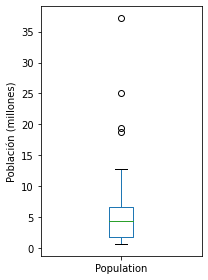

In [ ]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Población (millones)')

plt.tight_layout()
plt.show()

## Tablas de frecuencia e Histogramas

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [ ]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis = 1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


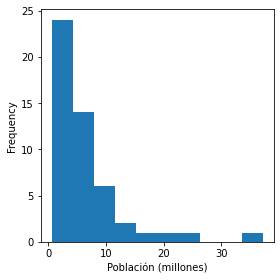

In [ ]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Población (millones)')

plt.tight_layout()
plt.show()

## Estimaciones de densidad

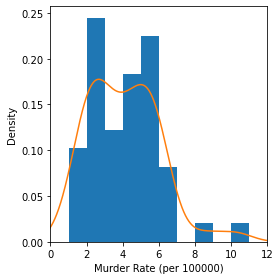

In [ ]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                    bins=range(1, 12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100000)')

plt.tight_layout()
plt.show()

## Data binaria y categórica

In [ ]:
!head $AIRPORT_DELAYS_CSV

"Carrier","ATC","Weather","Security","Inbound"
64263.16,84856.5,11235.42,343.15,118427.82


In [ ]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


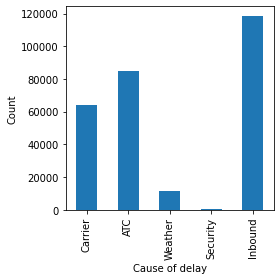

In [ ]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Correlation

In [ ]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [ ]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


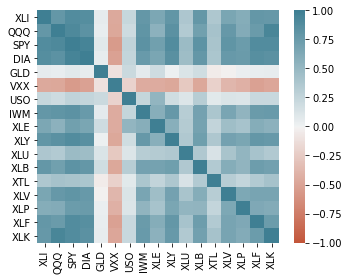

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

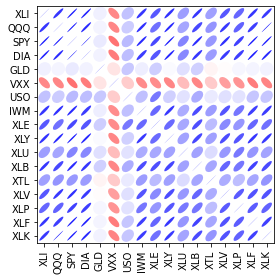

In [ ]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength
    # of the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

### Scatterplots

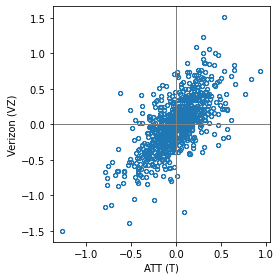

In [ ]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

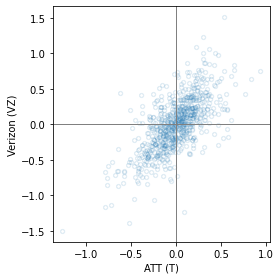

In [ ]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4),
                          marker='$\u25EF$', alpha=0.1)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

## 2 o más variables

### Hexbin

In [ ]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax['TaxAssessedValue'] < 750000) &
                     (kc_tax['SqFtTotLiving'] > 100) &
                     (kc_tax['SqFtTotLiving'] < 3500), :]
print(kc_tax.shape, kc_tax0.shape)

(498249, 3) (432693, 3)


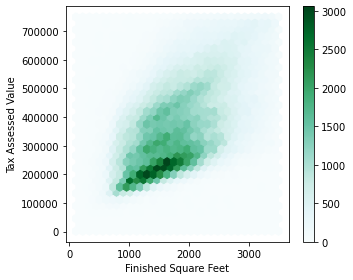

In [ ]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.kdeplot(kc_tax0['SqFtTotLiving'], kc_tax0['TaxAssessedValue'], ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

## 2 Variables Categóricas

In [ ]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

In [ ]:
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [ ]:
df = crosstab.copy().loc['A':'G', :]
df.loc[:, 'Charged Off':'Late'] =df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


## Violinplot para Data Categórica y Numérica

In [ ]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


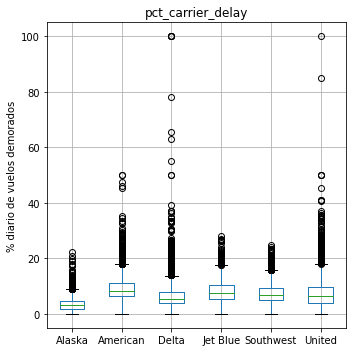

In [ ]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('% diario de vuelos demorados')
plt.suptitle('')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


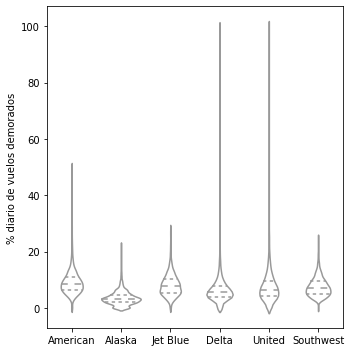

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(airline_stats['airline'], airline_stats['pct_carrier_delay'],
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('% diario de vuelos demorados')

plt.tight_layout()
plt.show()

## Visualización de múltiples variables

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0['ZipCode'].isin(zip_codes), :]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


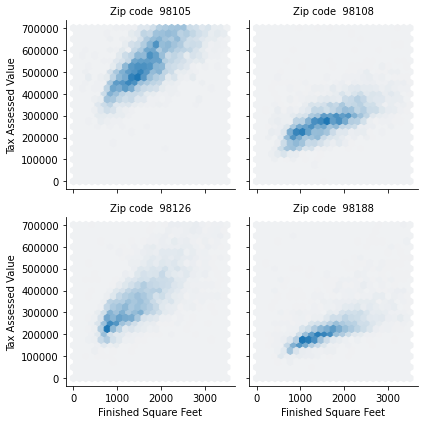

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name: .0f}')

plt.tight_layout()
plt.show()